# ECE 590, Fall 2019 
## Problem Set 6


## Full name: Bingying Liu (bl199)

## Problem 1 (Bayesian Network)

### 1) Indicate whether the following statements are true or false and explain why.

- $(H \perp \!\!\! \perp  L)|P$ a is **False statement** because it's equivalent to proving $P(H|L,P) = P(H|P)$. <br>
  Assume this statement is true, we prove by contradiction. We have
  $$ 
  \begin{align*}
  \frac{P(H,L,P)}{P(L,P)} &= \frac{P(H,P)}{P(P)} \\
  \frac{P(H,L,P)}{P(H,P)} &= \frac{P(L,P)}{P(P)} \\
  P(L|H,P) &= P(L|P)
  \end{align*}
  $$
  The conclusion is false because H contributes to both P and G.

  
- $(H \perp \!\!\! \perp  L)|P, G$ a is **True statement** because it's equivalent to proving $P(H|L,P,G) = P(H|P,G)$. <br>
  Assume this statement is true, we prove by contradiction. We have
  $$ 
  \begin{align*}
  \frac{P(H,L,P,G)}{P(L,P,G)} &= \frac{P(H,P,G)}{P(P,G)} \\
  \frac{P(H,L,P)}{P(H,P,G)} &= \frac{P(L,P,G)}{P(P,G)} \\
  P(L|H,P,G) &= P(L|P,G)
  \end{align*}
  $$
  The conclusion is true, therefore statement is true.


- $(P \perp \!\!\! \perp  D)|G$ a is **True statement** because it's equivalent to proving $P(P|D,G) = P(P|G)$. <br>
  Since P is independent of both D and G, this statement is clearly true.


- $(H \perp \!\!\! \perp  D)|L$ a is **False statement**.

### 2) Write down the factorized form of the joint distribution.
$$ P(H,D,P,G,L) = P(H) * P(D) * P(P|H) * P(G|H,D) * P(L|P,G)$$

### 3) Write down the expression for the probability of obtaining the letter of recommendation P(L=1) and compute P(L=1).
$$
\begin{align*}
P(L=1) &= \sum_{P \in {A,B}, G \in {A,B}}P(L=1|P,G)*P(P,G) \\
       &= 0.8*0.4 + 0.6*0.3 + 0.3*0.1 + 0.1*0.2 \\
       &= 0.32 + 0.18 + 0.03 + 0.02 \\
       &= 0.5 + 0.05 \\
       &= 0.55
\end{align*}
$$
Therefore, the probability of obtaining letter of recommendation $P(L=1)$ is 55%.

## Problem 2 (Image Denoising using Singular Value Decomposition)

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

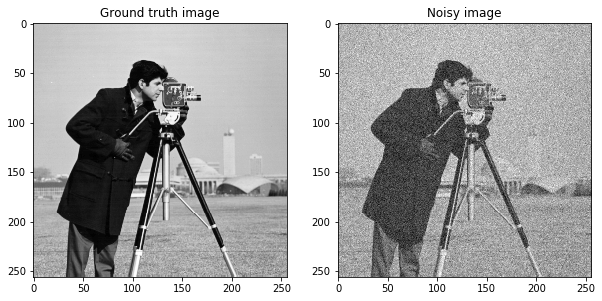

In [2]:
# reading the ground truth image 
im = imageio.imread('cameraman.png')

# normalize the image 
im = (im - np.min(im))/(np.max(im) - np.min(im))

# add some noise to the image 
n = 0.1 * np.random.randn(256,256)

# noisy image
im_noisy = im + n

# visualize the ground truth and noisy images 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im, cmap="gray")
plt.title("Ground truth image")

plt.subplot(1,2,2)
plt.imshow(im_noisy, cmap="gray")
plt.title("Noisy image")
plt.show()

In [3]:
"""
Reconstruct the image based on the SVD of the noisy image, then report the PSNR with respect
to the ground truth image 
"""
# PSNR: peak signal-to-noise ratio
def PSNR(im,im_reconstruct):
    im_np = np.asarray(im)
    im_reconstruct_np = np.asarray(im_reconstruct)
    m = im_np.shape[0]
    n = im_reconstruct_np.shape[1]

    MSE = 1/(m * n) * np.sum((im_np - im_reconstruct_np)**2)
    MAX = np.max(im)
    PSNR_value = 10 * np.log10(MAX**2/MSE)
    return PSNR_value

In [4]:
u, s, v = np.linalg.svd(im_noisy)
PSNR_list = []
k_image = []
for n_comp in range(1,101):
    im_reconstruct = u @ np.diag(s)[:,:n_comp] @ v[:n_comp,:]
    k_image.append(im_reconstruct)
    PSNR_value = PSNR(im, im_reconstruct)
    PSNR_list.append(PSNR_value)

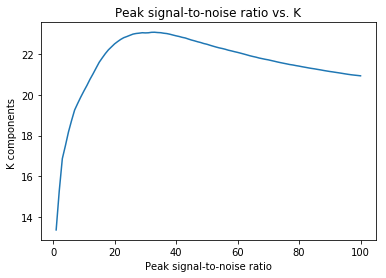

In [5]:
plt.plot(range(1,101),PSNR_list)
plt.title("Peak signal-to-noise ratio vs. K")
plt.xlabel("Peak signal-to-noise ratio")
plt.ylabel("K components ")
plt.show()

(-0.5, 255.5, 255.5, -0.5)

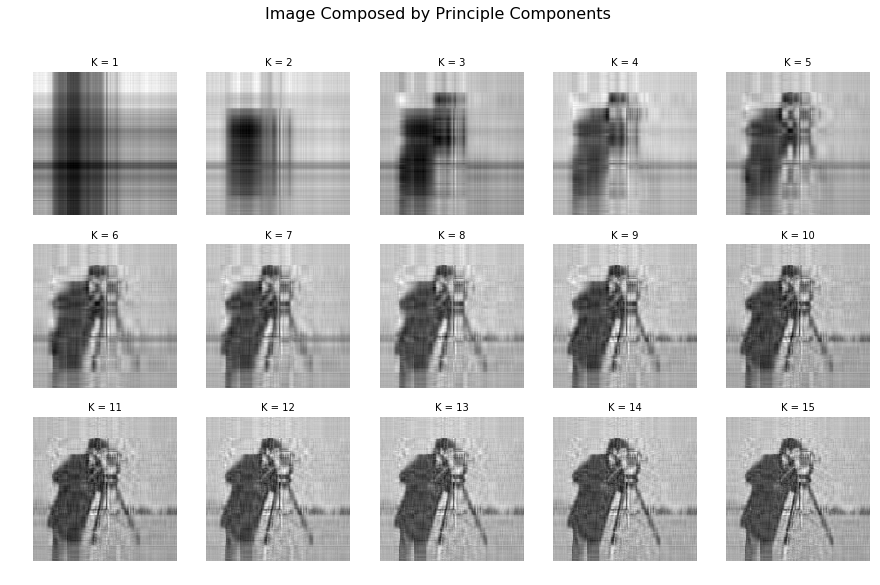

In [6]:
plt.figure(figsize=(15,9))
plt.suptitle("Image Composed by Principle Components",fontsize=16)
for num in range(1,16):
    plt.subplot(3,5,num)
    plt.title("K = %d" % (num), fontsize=10)
    plt.axis("off")
    plt.imshow(k_image[num-1],cmap='gray')
plt.axis("off")

## Problem 3: Feature Extraction using Autoencoder

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [4]:
batch_size = 100
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)

In [5]:
for i, data in enumerate(train_loader):
    img, lab = data
    if i == 0:
        print(img.size())
        print(lab.size())
        print(lab.type())
        print(torch.Tensor().type())
        img = img.view(img.size(0), -1)
        lab = lab.view(lab.size(0), -1)
        print(img.size())
        print(lab.size())       

torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.LongTensor
torch.FloatTensor
torch.Size([100, 784])
torch.Size([100, 1])


### 1. AE-based feature extraction 

The key is that models all compressed the original high dimension features into 3 dimensions & compare ae, cae and principle component.

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.Encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3)
        )
        self.Decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 28 * 28), 
            nn.Tanh()
        )
    def forward(self, x):
        h1 = self.Encoder(x)
        x = self.Decoder(h1)
        return h1, x

In [6]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-4)

In [9]:
min_loss = 10e+10
Num_epoch = 20
encoder_hidden_tr, encoder_hidden_te = torch.Tensor(), torch.Tensor()
labels_tr, labels_te = torch.Tensor().type(torch.LongTensor), torch.Tensor().type(torch.LongTensor)
for epoch in range(Num_epoch):
    running_loss = 0 
    for batch_ind, (image,label) in enumerate(train_loader):
        image = image.view(image.size(0), -1)
        label = label.view(label.size(0), -1)
        
        optimizer.zero_grad()
        h1, output = model(image)
        encoder_hidden_tr = torch.cat((encoder_hidden_tr, h1),0)
        labels_tr = torch.cat((labels_tr,label),0)
        loss = criterion(image, output)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch {}: Loss: {:.4f}'.format(epoch, running_loss/(batch_ind+1)))
    if (running_loss/(batch_ind+1)) < min_loss:
        torch.save(model, 'ckpt_autoencoder.pth')
        min_loss = running_loss/(batch_ind+1)
    
    for batch_ind, (image,label) in enumerate(test_loader):
        image = image.view(image.size(0), -1)
        label = label.view(label.size(0), -1)
        
        h1, output = model(image)
        encoder_hidden_te = torch.cat((encoder_hidden_te, h1),0)
        labels_te = torch.cat((labels_te,label),0)

Epoch 0: Loss: 0.2396


/home/deepecholiu/.local/lib/python3.6/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AutoEncoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch 1: Loss: 0.1788
Epoch 2: Loss: 0.1670
Epoch 3: Loss: 0.1620
Epoch 4: Loss: 0.1592
Epoch 5: Loss: 0.1570
Epoch 6: Loss: 0.1551
Epoch 7: Loss: 0.1533
Epoch 8: Loss: 0.1516
Epoch 9: Loss: 0.1499
Epoch 10: Loss: 0.1483
Epoch 11: Loss: 0.1471
Epoch 12: Loss: 0.1459
Epoch 13: Loss: 0.1449
Epoch 14: Loss: 0.1440
Epoch 15: Loss: 0.1433
Epoch 16: Loss: 0.1426
Epoch 17: Loss: 0.1420
Epoch 18: Loss: 0.1415
Epoch 19: Loss: 0.1409


In [10]:
encoder_hidden_tr.size(),labels_tr.size()  # wanna the last epoch's hidden layer

(torch.Size([1200000, 3]), torch.Size([1200000, 1]))

In [11]:
final_encoder_layer_tr = encoder_hidden_tr[-60000:,:] # the last hidden layer
final_labels_tr = labels_tr[-60000:,:]

final_encoder_layer_te = encoder_hidden_te[-60000:,:] # the last hidden layer
final_labels_te = labels_te[-60000:,:]

In [13]:
logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logreg.fit(final_encoder_layer_tr.detach().numpy(), final_labels_tr.numpy())

# Evaluate performance of model on training set
train_output = logreg.predict(final_encoder_layer_tr.detach().numpy())
accuracy_score(final_labels_tr.numpy(), train_output)

/home/deepecholiu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/deepecholiu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.73295

In [14]:
# Evaluate performance of model on test set
test_output = logreg.predict(final_encoder_layer_te.detach().numpy())
accuracy_score(final_labels_te.numpy(), test_output)

0.7249833333333333

So AE's training accuracy is 0.73295 and test accuracy is 0.72498.

### 2. CAE-based feature extraction

In [7]:
# CAE loss function referenced from https://stackoverflow.com/questions/58249160/how-to-implement-contractive-autoencoder-in-pytorch
def loss_function(hidden_represent, outputs, image, lamda = 1e-4):

    criterion = nn.MSELoss()
    loss1 = criterion(outputs, image)

    hidden_represent.backward(torch.ones(hidden_represent.size()), retain_graph=True)    
    # Frobenious norm, the square root of sum of all elements (absolute value) in a jacobian matrix 
    loss2 = torch.sqrt(torch.sum(torch.abs(image.grad)))
    image.grad.data.zero_()
    loss = loss1 + (lamda*loss2) 
    return loss 

In [8]:
model = AutoEncoder()
optimizer = optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-4)

In [11]:
min_loss = 10e+10
Num_epoch = 20
encoder_hidden_tr, encoder_hidden_te = torch.Tensor(), torch.Tensor()
labels_tr, labels_te = torch.Tensor().type(torch.LongTensor), torch.Tensor().type(torch.LongTensor)
for epoch in range(Num_epoch):
    running_loss = 0 
    for batch_ind, (image,label) in enumerate(train_loader):
        image = image.view(image.size(0), -1)
        label = label.view(label.size(0), -1)
        
        image.retain_grad()
        image.requires_grad_(True)
        h1, outputs = model(image)
        
        # Get the hidden layer and output label
        encoder_hidden_tr = torch.cat((encoder_hidden_tr, h1),0)
        labels_tr = torch.cat((labels_tr,label),0)
        
        loss = loss_function(h1, outputs, image, lamda = 1e-4)        
        image.requires_grad_(False)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch {}: Loss: {:.4f}'.format(epoch, running_loss/(batch_ind+1)))
    if (running_loss/(batch_ind+1)) < min_loss:
        torch.save(model, 'ckpt_contra_autoencoder.pth')
        min_loss = running_loss/(batch_ind+1)
    
    for batch_ind, (image,label) in enumerate(test_loader):
        image = image.view(image.size(0), -1)
        label = label.view(label.size(0), -1)
        
        h1, output = model(image)
        encoder_hidden_te = torch.cat((encoder_hidden_te, h1),0)
        labels_te = torch.cat((labels_te,label),0)

Epoch 0: Loss: 0.1427


/home/deepecholiu/.local/lib/python3.6/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AutoEncoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch 1: Loss: 0.1429
Epoch 2: Loss: 0.1424
Epoch 3: Loss: 0.1425
Epoch 4: Loss: 0.1421
Epoch 5: Loss: 0.1418
Epoch 6: Loss: 0.1415
Epoch 7: Loss: 0.1414
Epoch 8: Loss: 0.1413
Epoch 9: Loss: 0.1409
Epoch 10: Loss: 0.1414
Epoch 11: Loss: 0.1411
Epoch 12: Loss: 0.1406
Epoch 13: Loss: 0.1411
Epoch 14: Loss: 0.1406
Epoch 15: Loss: 0.1411
Epoch 16: Loss: 0.1413
Epoch 17: Loss: 0.1407
Epoch 18: Loss: 0.1405
Epoch 19: Loss: 0.1403


In [12]:
final_encoder_layer_tr = encoder_hidden_tr[-60000:,:] # the last hidden layer
final_labels_tr = labels_tr[-60000:,:]

final_encoder_layer_te = encoder_hidden_te[-60000:,:] # the last hidden layer
final_labels_te = labels_te[-60000:,:]

In [13]:
logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logreg.fit(final_encoder_layer_tr.detach().numpy(), final_labels_tr.numpy())

# Evaluate performance of model on training set
train_output = logreg.predict(final_encoder_layer_tr.detach().numpy())
accuracy_score(final_labels_tr.numpy(), train_output)

/home/deepecholiu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/deepecholiu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7581333333333333

In [14]:
# Evaluate performance of model on test set
test_output = logreg.predict(final_encoder_layer_te.detach().numpy())
accuracy_score(final_labels_te.numpy(), test_output)

0.7654

So CAE's training accuracy is 0.75813 and test accuracy is 0.7654 (slightly better than AE).

### 3. PCA-based feature extraction

In [3]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
# Can't use train_loader and test_loader 
train_X = train_set.data.reshape(60000, 28*28).float()
train_y = train_set.targets
test_X = test_set.data.reshape(10000, 28*28).float()
test_y = test_set.targets

In [75]:
# Fit the PCA model to training set
pca = PCA(n_components=3)
pca.fit(train_X)

# Encode training and test values
encoded_train_X = pca.transform(train_X)
encoded_test_X = pca.transform(test_X)

In [74]:
# Build multiclass logreg model, with the encoded values as input
logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logreg.fit(encoded_train_X, train_y)

# Evaluate performance of model on training set
train_output = logreg.predict(encoded_train_X)
accuracy_score(train_y, train_output)

/home/deepecholiu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.46676666666666666

In [76]:
# Evaluate performance of model on test set
test_output = logreg.predict(encoded_test_X)
accuracy_score(test_y, test_output)

0.4785

So PCA's training accuracy is 0.467 and test accuracy is 0.4785.